In [1]:
import numpy as np
import scipy.optimize as optimize
from autograd import grad, jacobian, numpy as aunp
from src.optimization import opt_newton, opt_secant, show_plot

## 3. One Dimensional Optimization
**Definition 3.0.1** Optimization of a scalar valued function having the form:

\begin{align}
f(x^*) &=\min_x f(x),\quad x\in\mathbb{R}
\end{align}

There are a number of methods that can be used for this particular type of problem including those that will not require derivatives. The methods presented below, however, cover only those using derivatives.

### 3.1 Unimodal Function
**Definition 3.1.1** A continuous function $f(x)$ where $x \in\mathbb{R}$ is unimodal if for a value $x^*$ along the interval $[a,b]$, the following conditions are satisfied:
- $f(x)$ is monotonically decreasing between $a$ and $x^*$.
- $f(x)$ is monotonically increasing between $x^*$ and $b$.

then $f(x^*)$ is the minimum value and $x^*$ is the minimizer of $f(x)$.

**Example** Let a quadratic function of one variable be $f(x) = 5x^2 - 3x + 2$. It is a non-linear unimodal function defined over the interval $[-2,2]$. The minimizer $x^*=0.3$, as solved shown below, given the middle dotted line lies inside the the interval $[x_l,x_r]=[-2,2]$.


Find the gradient of $f(x)$:\
$f'(x)=\frac{d}{dx}[5x^2 - 3x + 2]$\
$f'(x)=10x - 3$

Equating to 0, and solve for x:\
$10x - 3=0$\
$x=\frac{3}{10}$\
$x*=0.3$

We notice that $f(x)$ strictly decreases when $x \lt x^*$ and strictly increases for $x \gt x^*$. The interval $[x_l,x_r]$ that has the minimizer within it, is called the ***interval of uncertainty*** and the goal of an optimization algorithm is to reduce this interval as much as possible to converge towards the minimizer. A good algorithm completes the convergence very fast. In each step of this reduction of the interval, the algorithm finds a new unimodal interval by following these steps.

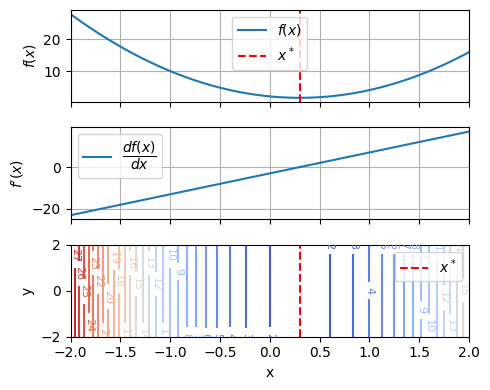

In [2]:
f = lambda x: 5*x**2 - 3*x + 2
domain = [-2,2]
minimum = 0.3
show_plot(f, x_star=minimum, domain=domain)

### 3.2. Newton's Method
For a given objective function $f(x)$ where $x\in \mathbb(R)$ the necessary condition for it to contain the minimizer $x^*$, is that $\frac{df}{dx}x^* = 0$. The aim of these direct root-finding methods is to obtain the solution to the equation:

\begin{align}
\frac{df}{dx}x = 0 \qquad (3.2.0)
\end{align}

At point x_j, the Taylor's expansion of the objective function up to the second order terms is given by:

\begin{align}
\frac{df}{dx}x = 0
\end{align}

At point x_j, the Taylor's expansion of the objective function, up to the second order terms is given by:

\begin{align}
f(x)=f(x_j) + \frac{d}{dx}f(x_j)(x-x_j) + \frac{1}{2} \frac{d^2}{dx^2}f(x_j)(x-x_j)^2 \qquad (3.2.1)
\end{align}

Now,

\begin{align}
\frac{d}{dx}f(x_j)=0
\end{align}

So Eq.(3.2.1) reduces to:

\begin{align}
f(x)=f(x_j) + \frac{1}{2} \frac{d^2}{dx^2}f(x_j)(x-x_j)^2
\end{align}

Here $\frac{d^2}{dx^2}f(x_j)$ is a constant. Now, we find the derivative of Eq.(3.2.1) and set it to 0 followint Eq.(3.2.0)

\begin{align}
\frac{d}{dx}\left[f(x)\right]=0\\
\frac{d}{dx}\left[f(x_j) + \frac{1}{2} \frac{d^2}{dx^2}f(x_j)(x-x_j)^2 \right] = 0\\
\frac{d}{dx}f(x_j) + \frac{d^2}{dx^2}f(x_j)(x-x_j) = 0
\end{align}

We get:

\begin{align}
x=x_j- \frac{\frac{d}{dx}f(x_j)}{\frac{d^2}{dx^2}f(x_j)} = 0
\end{align}

The termination condition for convergence after a sufficient number of large iterations to x^* is given by:

\begin{align}
\left|{\frac{d}{dx}f(x_{j+1}}\right| \leq \epsilon
\end{align}

Where $\epsilon$ is the tolerance set by the user for the optimization algorithm. In numerical analysis, Newton's Method is also known as Newton-Raphson Method because it was later improved by Raphson. This method has fast convergence called quaratic convergence.

**Definition 3.2.1** For a twice differentiable function $f(x)$, assuming that its minimizer $x^*$ lies in the interval $(x_l,x_r)$ with $\frac{d}{dx}f(x^*) \neq 0$ and $f(x^*)=0$, for the Newton's iteration, if $x_j$ converges to $x^*$ for a large number of iterations $j\rightarrow\infty$, $x_j$ is said to be quadratically convergent to $x^*$ if the following condition is satisfied:

\begin{align}
\left|x_{j+1} -x^*\right| \leq M|x_j-x^*|^2, if M \gt \frac{\left|\frac{d^2}{dx^2}f(x^*)\right|}{2\left|\frac{d}{dx}f(x^*)\right|}
\end{align}

**Proof** Let us consider:
\begin{align}
\epsilon_j = x_j - x^* \qquad (3.2.1)
\end{align}

Now using Taylor's expansion of the linear term, we can write:
\begin{align}
f(x)=f(x_j) + \frac{d}{dx}f(x_j)(x - x_j) \qquad (3.2.2)
\end{align}

As $f(x)=0$, we have
\begin{align}
0 &= f(x_j) + \frac{d}{dx}f(x_j)(x - x_j)\\
x &= x_j - \frac{f(x_j)}{\frac{d}{dx}f(x_j)} \qquad (3.2.3)
\end{align}

Which can be re-written in iterative form:
\begin{align}
x_{j+1} = x_j - \frac{f(x_j)}{\frac{d}{dx}f(x_j)} \qquad (3.2.4)
\end{align}

Now using Taylor expansion arount the point $x^*$
\begin{align}
f(x^*)&=f(x_j - \epsilon_j)\\
&= f(x_j) - \epsilon_j\frac{d}{dx}f(x_j) + \frac{\epsilon_j^2}{2!}\frac{d^2}{dx}f(\beta_j)
\end{align}

Where $\beta_j \in x_j, x_r$ along with the fact $f(x^*)=0$, we use Eq.(3.2.1) in Eq.(3.2.2) and get
\begin{align}
0=f(x_j) - (x_j-x^*)\frac{d}{dx}f(x_j) + \frac{\epsilon_j^2}{2!}\frac{d^2}{dx}f(\beta_j)
\end{align}

As we know $\frac{df}{dx}$ is continuous and $\frac{d}{dx}f(x_j) \neq 0$ for those values of $x_j$ where $x_j$ is very close to $x^*$. Dividing with $\frac{d}{dx}f(x_j)$, we have
\begin{align}
0=\frac{f(x_j)}{\frac{d}{dx}f(x_j)} - (x_j-x^*) + \frac{\epsilon_j^2}{2!}\frac{\frac{d^2}{dx}f(\beta_j)}{\frac{d}{dx}f(x_j)}
\end{align}

Now using Eq.(3.2.4) in place of the first term
\begin{align}
0 &= (x_j-x_{j+1}) - (x_j -x^*) + \frac{\epsilon_j^2}{2!}\frac{\frac{d^2}{dx}f(\beta_j)}{\frac{d}{dx}f(x_j)}\\
x_{j+1} - x^* &= \frac{\epsilon_j^2}{2!}\frac{\frac{d^2}{dx}f(\beta_j)}{\frac{d}{dx}f(x_j)}\\
x_{j+1} - x^* &= \frac{1}{2}\frac{\frac{d^2}{dx}f(\beta_j)}{\frac{d}{dx}f(x_j)}(x_j-x^*)^2\\
\left|x_{j+1} - x^*\right| &\leq \frac{1}{2}\frac{\frac{d^2}{dx}f(\beta_j)}{\frac{d}{dx}f(x_j)}\left|x_j-x^*\right|^2\\
\end{align}

Now, $\frac{d}{dx}f(x_j)$ converges to $\frac{d}{dx}f(x^*)$ due to continuity of $f(x)$.\
Lying between $x_j$ and $x^*$ is $\beta_j$ which also converges to $x^*$, resulting in the convergence of $\frac{d^2}{dx^2}f(\beta_j)$ to $\frac{d^2}{dx^2}f(x^*)$. Hence, as $j\rightarrow \infty$, we have
\begin{align}
|x_{j+1} - x^*| \leq M|x_j-x^*|^2, \quad \text{if } M \geq \frac{1}{2}\frac{\frac{d^2}{dx}f(x^*)}{\frac{d}{dx}f(x^*)}
\end{align}

$\overline{\underline{\textbf{Newtons Method:} \text{Approximate x* and f(x*)}}}$\
$\textbf{Inputs}$: $f(x)$, $x_0$, $\epsilon$\
f' $\leftarrow \infty$\
f" $\leftarrow \infty$\
$x_j \leftarrow x_0$\
$x_{j+1} \leftarrow x_0$\
$x^* \leftarrow \infty$\
error $\leftarrow \infty$\
$\textbf{while TRUE do}$\
|$\quad f' \leftarrow f'(x_j)$\
|$\quad f" \leftarrow f"(x_j)$\
|$\quad x_{j+1} \leftarrow x_j-\frac{f'}{f"}$\
|$\quad error \leftarrow |x_{j+1}-x_j|$\
|$\quad\textbf{if}$ $\text{error} \leq \epsilon$ $\textbf{then}$\
|$\quad$| $\quad$ $x^* \leftarrow x_{j+1}$\
|$\quad$| $\quad$ $\textbf{break}$\
|$\quad$ $\textbf{else}$\
|$\quad$| $\quad$ $x_j \leftarrow x_{j+1}$\
|$\quad$ $\textbf{end if}$\
$\textbf{end while}$\
$\textbf{return } (x^*, f(x^*))$

**Example 1** Consider the objective function given by $f(x)=5x^2 -3x + 2$\
$\Box$ Find the root $x^*$ given the initial values $[-2, 2]$ and tolerance error of $\epsilon=10^{-7}$.

In [3]:
# Formulate objective function
f=lambda x: 5*x**2 - 3*x + 2

# Domain where to find the minimizer x*
limits = [-2., 2.]

# Error Threshold
epsilon = 10**-7

# Maximum search iteration
maxiter = 50

# Run the minimizer function
x_star, _ = opt_newton(f, domain=limits, epsilon=10**-7, maxIter=50, verbose=False)

x*:0.300000 f(x*): 1.550000


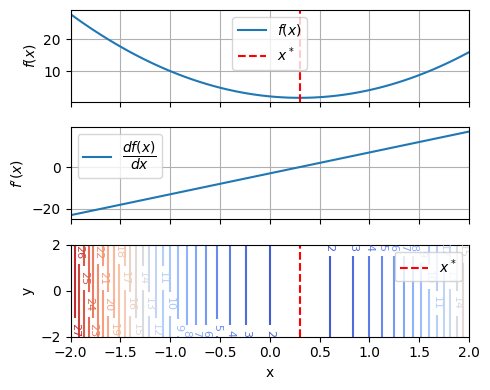

In [4]:
show_plot(f, x_star, domain=limits, samples=100)

**Example 2** Consider the objective function given by $f(x)=x\cos(x^2-7x)-2x$\
$\Box$ Find the root $x^*$ given the initial values $[-1.5,1]$ and tolerance error of $\epsilon=10^{-7}$.

In [5]:
f = lambda x: x*aunp.cos(x**2-7*x) - 2*x
limits = [0.2, 1.0]
epsilon = 10**-7
maxiter = 50
x_star, _ = opt_newton(f, domain=limits, epsilon=10**-7, maxIter=50)

x*:0.624191 f(x*): -1.665875


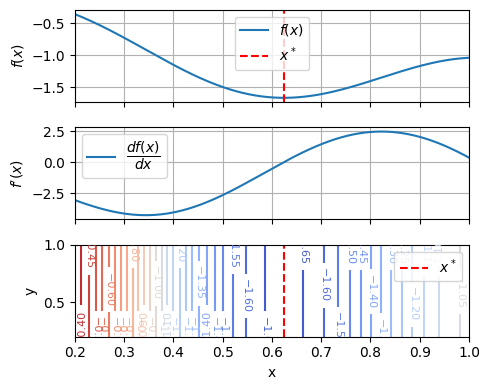

In [6]:
show_plot(f, x_star, domain=limits)

### 3.3 Secant Method
The formulation of the secant method:
\begin{align}
\frac{d}{dx}f(x_j) + s \frac{d^2}{dx^2}f(x_j) = 0
\end{align}

Where $s$ is the slope of the line connecting the points $(a, \frac{d}{dx}f(a))$ on the $x-\frac{df}{dx}$ plane $a$ and $b$ are two different approximations to the root of the objective function.
\begin{align}
s=\frac{\frac{d}{dx}f(b) - \frac{d}{dx}f(a)}{b-a}
\end{align}

So Eq.(3.3.1) can be written as
\begin{align}
\frac{d^2}{dx^2}f(x_j) &= -\frac{\frac{d}{dx}f(x_j)}{s}\\
&= -\frac{\frac{d}{dx}f(x_j)}{\frac{\frac{d}{dx}f(b) - \frac{d}{dx}f(a)}{b-a}}\\
&= -\frac{\frac{d}{dx}f(x_j)(b-a)}{\frac{d}{dx}f(b) - \frac{d}{dx}f(a)}
\end{align}

The iterative process for the secant method is given as
\begin{align}
x_{j+1} - x_j &= -\frac{\frac{d}{dx}f(x_j)(b-a)}{\frac{d}{dx}f(b) - \frac{d}{dx}f(a)}\\
x_{j+1} &= x_j - \frac{\frac{d}{dx}f(x_j)(b-a)}{\frac{d}{dx}f(b) - \frac{d}{dx}f(a)}\\
x_{j+1} &= x_j - \frac{\frac{d}{dx}f(x_j)(x_j-x_{j-1})}{\frac{d}{dx}f(x_j) - \frac{d}{dx}f(x_{j-1})}
\end{align}

The secant of a curve is a line that intersects the curve at minimum of two distinct points. As $b \rightarrow a$, the secant approaches $\frac{d^2}{dx^2}f(a)$. Due to this reason, the secant method is also known as Quasi-Newton Method. The root $x^*$ lies between the points a and b if the following condition is satisfied:
\begin{align}
\frac{d}{dx}f(a)\frac{d}{dx}f(b) \lt 0
\end{align}

As we have seen the iteration process requires two initial points. The iterates x_j converges to the root of the objective function when a and b are close to the root. The order of convergence for the process is given by the number $\iota=\frac{\sqrt{5}+1}{2} \approx 1.618$ which is the same as golden ratio.

$\overline{\underline{\textbf{Secant Method:} \text{Approximate x* and f(x*)}}}$\
$\textbf{Inputs}$: $f(x)$, $x_0$, $\epsilon$\
f' $\leftarrow \infty$\
$x_{j-1} \leftarrow 0$\
$x_j \leftarrow x_0$\
$x_{j+1} \leftarrow x_0$\
$x^* \leftarrow \infty$\
error $\leftarrow \infty$\
$\textbf{while $f'(x_{j-1})f'(x_j)\lt0$ do}$\
|$\quad f' \leftarrow f'(x_j)$\
|$\quad x_{j+1} \leftarrow x_j-\frac{f'(x_j)(x_j-x_{j-1})}{f'(x_j) - f'(x_{j-1})}$\
|$\quad error \leftarrow |x_{j+1}-x_j|$\
|$\quad\textbf{if}$ $\text{error} \leq \epsilon$ $\textbf{ then}$\
|$\quad$ | $\quad$ $x^* \rightarrow x_{j+1}$\
|$\quad$ | $\quad$ $\textbf{break}$\
|$\quad$ $ \textbf{else}$\
|$\quad$ | $\quad$ $x_{j-1} \leftarrow x_{j}$\
|$\quad$ | $\quad$ $x_j \leftarrow x_{j+1}$\
|$\quad$ $\textbf{end if}$\
$\textbf{end while}$\
$\textbf{return } (x^*, f(x^*))$

**Example 1** Consider the objective function given by $f(x)=5x^2 -3x + 2$\
$\Box$ Find the root $x^*$ given the initial values $[-2, 2]$ and tolerance error of $\epsilon=10^{-7}$.

In [7]:
f = lambda x: 5*x**2 - 3*x + 2
limits=[-2.,2.]    
x_star, _ = opt_secant(f, domain=limits, verbose=False)

x*: 0.300000 f(x*): 1.550000


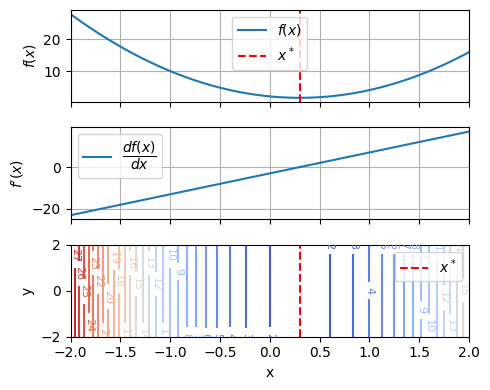

In [8]:
show_plot(f, x_star, domain=limits)

In [ ]:
# Validate using scipy optimizer
import autograd.numpy as aunp
#f = lambda x: x*aunp.cos(x**2-7*x) - 2*x
f = lambda x: 5*x**2 - 3*x + 2
fprime = grad(f)
def fp(x):
    return f(x),fprime(x)
sol=optimize.root_scalar(fp, x0=-1.5,x1=1.,fprime=True,xtol=10**-7,method="secant")
print(sol)

**Example 2** Consider the objective function given by $f(x)=x\cos(x^2-7x)-2x$\
$\Box$ Find the root $x^*$ given the initial values $[-1.5,1]$ and tolerance error of $\epsilon=10^{-7}$.

In [9]:
f = lambda x: x*aunp.cos(x**2-7*x) - 2*x
limits=[-1.5,1.]    
x_star, _ = opt_secant(f, domain=limits)

x*: 0.624191 f(x*): -1.665875


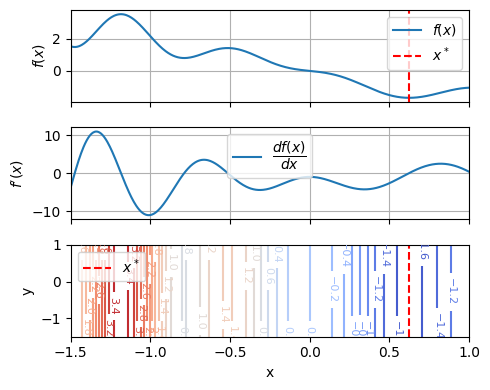

In [10]:
show_plot(f, x_star, domain=limits)

**Example 3** Consider the objective function given by $f(x)=x^3 - x^2 - 1$\
$\Box$ Find the root $x^*$ given the initial values $[-0.5,1]$ and tolerance error of $\epsilon=10^{-7}$.

Solving for minimum:\
$f(x)=x^3 - x^2 - 1$\
$f'(x)=\frac{d}{dx}[x^3 - x^2 - 1]$\
$f'(x)=3x^2 - 2x$\
$0=3x^2 - 2x$\
$0=(x)(3x - 2)$\
$x=0, x=\frac{2}{3} \approx 0.67$

In [11]:
f = lambda x: x**3 - x**2 -1
limits=[0.001, 1.0]    
x_star, _ = opt_secant(f, domain=limits, verbose=False)

x*: 0.666667 f(x*): -1.148148


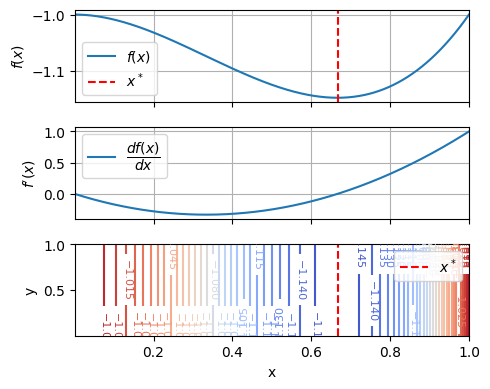

In [12]:
show_plot(f, x_star, domain=limits)

### Reference
[1] [Engineering Optimization: Theory and Practice 2009, S. Rao](https://www.amazon.com/Engineering-Optimization-Practice-Singiresu-Rao/dp/0470183527)

[2] [Quadratic Convergence of Newton's Method, Michael Overton, Numerical Computing, Spring 2017](https://cs.nyu.edu/~overton/NumericalComputing/newton.pdf)